In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 
import math as m

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

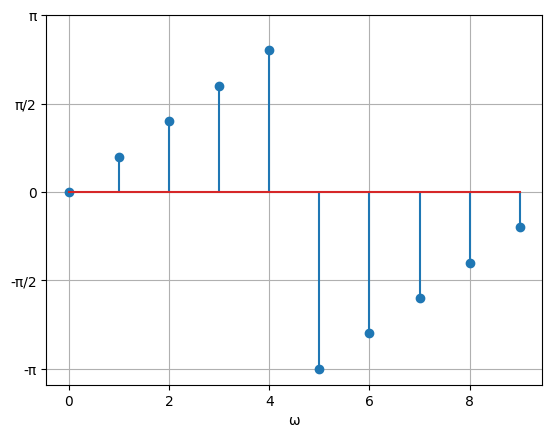

In [82]:
n = 10
fig, ax = plt.subplots()

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.stem(np.arange(n), wavenum(np.arange(n), n))
plt.xlabel("ω")
# plt.ylabel("Wavenum(w)")
plt.yticks([-n/2, -n/4, 0,n/4,n/2], ['-π','-π/2', '0', 'π/2','π'])
plt.grid()

Text(0, 0.5, 'F(ω)')

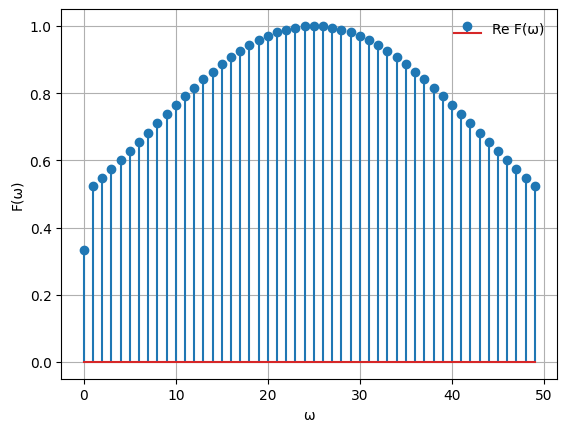

In [134]:
# Create filter.
filter_size = 50

M = 1
H = np.zeros(filter_size, dtype=complex)

for i in range(filter_size):
    k = wavenum(i, filter_size)
    a = 2 * np.pi / filter_size * k
    
    #G_b, integral from -M to M of cos(t*pi/M) e^(-iwt)
    if (m.isclose(a, np.pi/M)):
        H[i] = M
    elif (m.isclose(a, -np.pi/M)):
        H[i] = M
    else:
        H[i] += -(M**2*a*np.sin(M*a) - M**3*a**2+np.pi**2*M)/(M**2 * a**2 - np.pi**2)

#     print(H[i])
    # G_a, integral from -M to M of e^(-iwt)
    if a != 0:
        H[i] += 2 * np.sin(M * a) / a
    else:
        H[i] = 3 * M
        
        
H /= 3.0 * M


fig, ax = plt.subplots()

import matplotlib.ticker as tck


ax.stem(np.arange(filter_size),  np.fft.fftshift(H).real, label="Re F(ω)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).imag, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(H)), label = "|F(ω)|", linestyle='dashed', color='black')
ax.grid()
ax.legend(frameon=False)
plt.xlabel("ω")
plt.ylabel("F(ω)")



# POSTER PLOT


# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).real, linewidth=2.5, label="Re F(ω)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).imag, linewidth=2.5, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(H)), linewidth=2.5, label = "|F(ω)|", linestyle='dashed', color='black')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
# # ax.xaxis.set_major_locator(tck.MultipleLocator(base=1/3))
# ax.grid()
# ax.legend(loc=2, prop={'size':16}, frameon=False)
# plt.xlabel("ω", fontsize=16)
# plt.ylabel("F(ω)", fontsize=16)
# plt.xticks([0, filter_size/4, filter_size/2, filter_size/2 + filter_size/4,filter_size], ['-π','-π/2', '0', 'π/2','π'])


Text(0.5, 0, 'Time Domain')

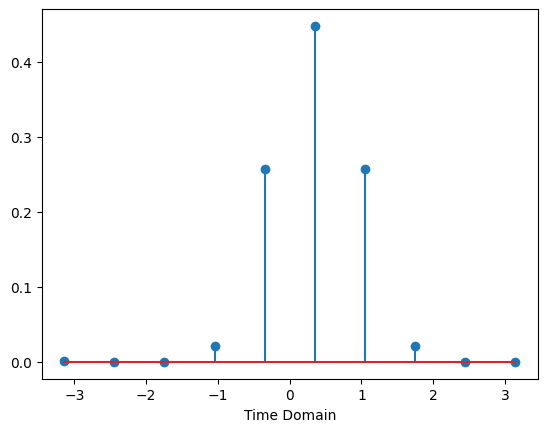

In [102]:
# Inverse Fourier Transform of the filter, fftshifted. TIME DOMAIN
h = np.fft.ifft(H)
plt.stem(np.linspace(-np.pi, np.pi, filter_size), np.fft.fftshift(h).real)
plt.xlabel("Time Domain")

([<matplotlib.axis.XTick at 0x124852d10>,
 [Text(-3.141592653589793, 0, '0'),
  Text(-1.5707963267948966, 0, '-π/2'),
  Text(0.0, 0, '0'),
  Text(1.5707963267948966, 0, 'π/2'),
  Text(3.141592653589793, 0, 'π')])

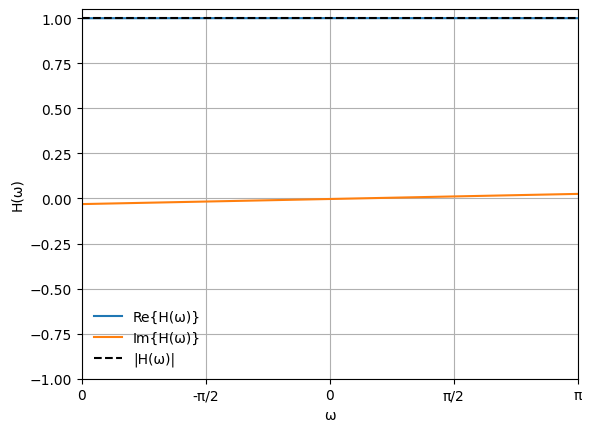

In [103]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
SHIFT = 20.01
delta = SHIFT % 1
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(-2j * np.pi * delta * wavenum(i,filter_size)/filter_size)
    
    

# for i in range(filter_size):
#     L[i] = np.exp(-2j * np.pi * delta * i/filter_size)
    
# x /= np.linspace(-np.pi, np.pi ,filter_size)    
# plt.stem(x, np.fft.fftshift(L.real))


# fig, ax = plt.subplots()

# import matplotlib.ticker as tck


# ax.plot(x,  np.fft.fftshift(L.real), label="Re H(ω)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(L).imag, linewidth=2.5, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(L)), linewidth=2.5, label = "|F(ω)|", linestyle='dashed', color='black')
# ax.grid()
# ax.legend(loc='center',frameon=False)
# plt.xlabel("ω")
# plt.ylabel("H(ω)")

    
    
fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi ,filter_size)
ax.plot(x, np.fft.fftshift(L.real), label="Re{H(ω)}")
ax.plot(x, -np.fft.fftshift(L.imag), label="Im{H(ω)}")
plt.xlabel("ω")
plt.ylabel("H(ω)")
ax.plot(x, np.abs(np.fft.fftshift(L)), label="|H(ω)|", linestyle='dashed', color='black')
plt.xlim([-np.pi, np.pi])
plt.ylim([-1,1.05])
plt.legend(frameon=False)
plt.grid()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.xticks([-np.pi, -np.pi/2, 0,  np.pi/2, np.pi], ['0','-π/2', '0', 'π/2','π'])

# plt.stem(np.linspace(-np.pi, np.pi, filter_size), L.real)
# plt.xlabel("Frequency domain")

Text(0, 0.5, 'F(ω)')

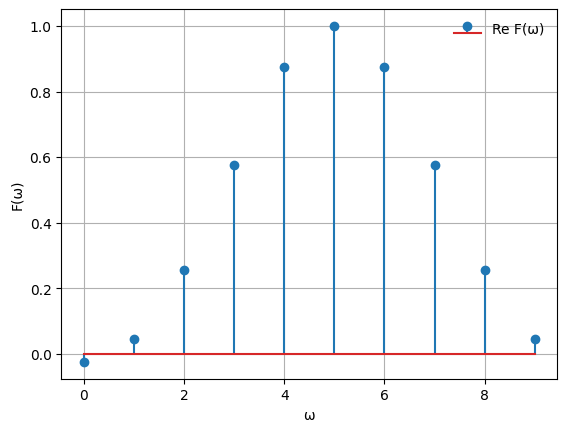

In [104]:
fig, ax = plt.subplots()

import matplotlib.ticker as tck


ax.stem(np.arange(filter_size),  np.fft.fftshift((L * H).real), label="Re F(ω)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).imag, linewidth=2.5, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(H)), linewidth=2.5, label = "|F(ω)|", linestyle='dashed', color='black')
ax.grid()
ax.legend(frameon=False)
plt.xlabel("ω")
plt.ylabel("F(ω)")




# plt.stem(np.arange(filter_size), np.fft.fftshift((L * H).real))
# plt.xlabel("Frequencies.")

In [105]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
# for i in range(filter_size):
#     print(z[i])
# plt.stem(np.arange(filter_size),z.real)
# plt.xlabel("Time domain")

Text(0, 0.5, 'z(t)')

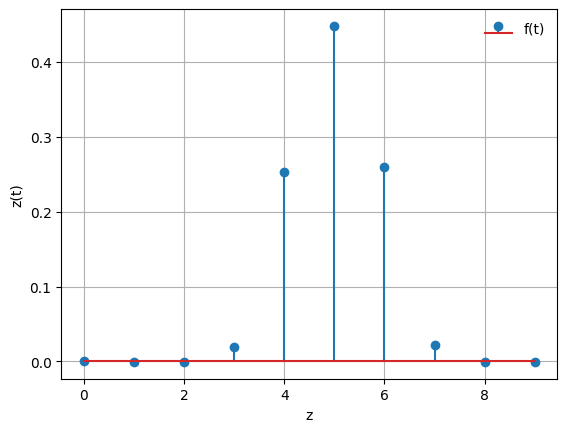

In [106]:
fig, ax = plt.subplots()

import matplotlib.ticker as tck


ax.stem(np.arange(filter_size),  np.fft.fftshift(z).real, label="f(t)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).imag, linewidth=2.5, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(H)), linewidth=2.5, label = "|F(ω)|", linestyle='dashed', color='black')
ax.grid()
ax.legend(frameon=False)
plt.xlabel("z")
plt.ylabel("z(t)")


# ax.stem(np.arange(filter_size), np.fft.fftshift(z).real)


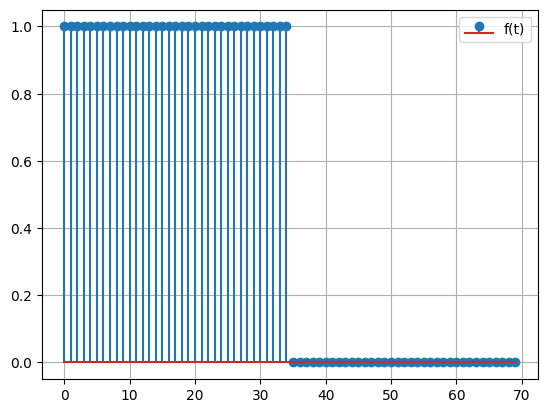

In [143]:
n = 70
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.stem(x_o,x, label='f(t)')
plt.grid()
plt.legend()

<StemContainer object of 3 artists>

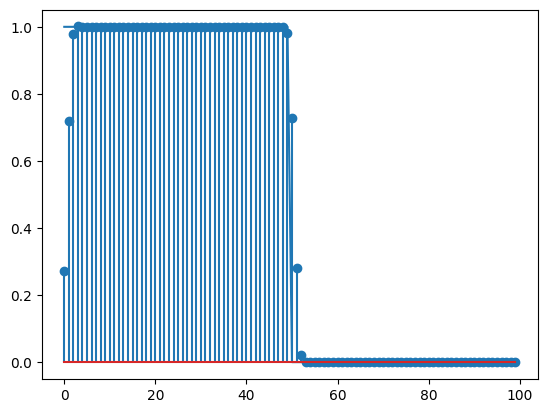

In [136]:
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,np.fft.fftshift(z), "same")
plt.plot(x_o,x)
plt.stem(x_o,x_shifted_filter.real)

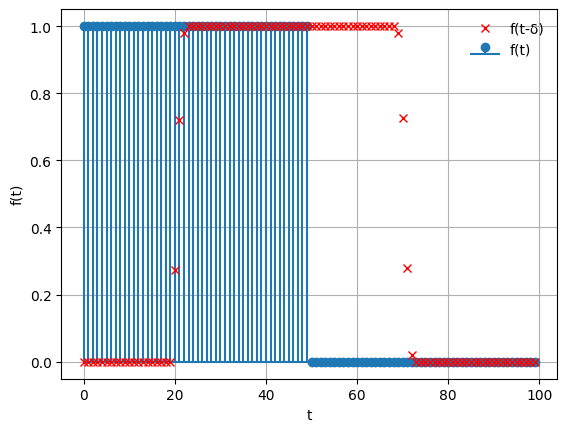

In [137]:
x_shifted = np.zeros(n, dtype=complex)
for i in range(n):
        new_index = (i + int(SHIFT)) % n
        x_shifted[new_index] = x_shifted_filter[i]
        
        
        
fig, ax = plt.subplots()

import matplotlib.ticker as tck


# ax.stem(np.arange(filter_size),  np.fft.fftshift((L * H).real), label="Re F(ω)")
# ax.plot(np.arange(filter_size),  np.fft.fftshift(H).imag, linewidth=2.5, label="Im F(ω)")
# ax.plot(np.arange(filter_size),  np.abs(np.fft.fftshift(H)), linewidth=2.5, label = "|F(ω)|", linestyle='dashed', color='black')
ax.grid()
plt.xlabel("t")
plt.ylabel("f(t)")
# Create a stem plot
ax.stem(x_o,x, label="f(t)", basefmt="-")
ax.plot(x_o,x_shifted.real, label= "f(t-δ)", linestyle='None', marker='x', color='red')
ax.legend(frameon=False)


